# **EDA Notebook**



---
## 0. Setup Environment

In [1]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT3",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



You can now save your data files in: c:\Users\brohao\Desktop\UTS\36106\ClassificationAnalysis-36106-GroupAssignment\36106\assignment\AT3\data


---
## Student Information

In [2]:
# <Student to fill this section>
group_name = "Group 12"
student_name = "Jiayu Hao"
student_id = "25948860"

In [3]:
# Do not modify this code
print_tile(size="h1", key='group_name', value=group_name)

In [4]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [6]:
! pip install numpy
! pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 0.b Import Packages

In [7]:
# <Student to fill this section>
import pandas as pd
import altair as alt

In [8]:
import numpy as np
import matplotlib.pyplot as plt

---
## B. Data Understanding

In [9]:
# Do not modify this code
try:
  df = pd.read_csv(at.folder_path / "sales_2022.csv")
except Exception as e:
  print(e)

### B.1 Explore Dataset

In [10]:
print("Shape of dataset:", df.shape)   # rows * columns

# Overview of data types and non-null counts
print("\nDataset Info:")
print(df.info())

# First few rows
print("\nFirst 5 rows of testing set:")
pd.set_option("display.max_columns", None)
display(df.head())

# Summary statistics for numerical features
print("\nSummary statistics for numerical variables:")
display(df.describe().T)

# Summary for categorical features
print("\nUnique values count for categorical variables:")
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Shape of dataset: (29481, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29481 entries, 0 to 29480
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     29481 non-null  int64 
 1   orderdate      29481 non-null  object
 2   stockdate      29481 non-null  object
 3   order_number   29481 non-null  object
 4   product_id     29481 non-null  int64 
 5   customer_key   29481 non-null  int64 
 6   territorykey   29481 non-null  int64 
 7   orderlineitem  29481 non-null  int64 
 8   orderquantity  29481 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.0+ MB
None

First 5 rows of testing set:


,Unnamed: 0,orderdate,stockdate,order_number,product_id,customer_key,territorykey,orderlineitem,orderquantity
0,0,2022-01-01,2021-12-13,SO61285,529,23791,1,2,2
1,1,2022-01-01,2021-09-24,SO61285,214,23791,1,3,1
2,2,2022-01-01,2021-09-04,SO61285,540,23791,1,1,1
3,3,2022-01-01,2021-09-28,SO61301,529,16747,1,2,2
4,4,2022-01-01,2021-10-21,SO61301,377,16747,1,1,1



Summary statistics for numerical variables:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,29481.0,14740.000000,8510.575979,0.0,7370.0,14740.0,22110.0,29480.0
product_id,29481.0,446.461382,121.027611,214.0,381.0,480.0,530.0,606.0
customer_key,29481.0,19116.104406,5329.153213,11001.0,14551.0,18362.0,23701.0,29480.0
territorykey,29481.0,6.207727,2.957099,1.0,4.0,7.0,9.0,10.0
orderlineitem,29481.0,1.984804,1.032695,1.0,1.0,2.0,3.0,8.0
orderquantity,29481.0,1.537058,0.617249,1.0,1.0,1.0,2.0,3.0



Unique values count for categorical variables:
orderdate: 181 unique values
stockdate: 286 unique values
order_number: 11839 unique values


In [11]:
# Missing values
print("\nMissing values per column:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

# Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:


Series([], dtype: int64)


Number of duplicate rows: 0


In [12]:
# Uniqueness and potential key structure
print("\nCheck uniqueness of order records:")
unique_orders = df[['order_number', 'orderlineitem']].duplicated().sum()
print(f"Duplicate order_number + orderlineitem combinations: {unique_orders}")


Check uniqueness of order records:
Duplicate order_number + orderlineitem combinations: 0


In [13]:
# Check uniqueness counts for key identifiers
print("\nUnique identifier counts:")
print(f"Unique order_number: {df['order_number'].nunique()}")
print(f"Unique customer_key: {df['customer_key'].nunique()}")
print(f"Unique product_id: {df['product_id'].nunique()}")
print(f"Unique territorykey: {df['territorykey'].nunique()}")


Unique identifier counts:
Unique order_number: 11839
Unique customer_key: 10502
Unique product_id: 102
Unique territorykey: 10


In [14]:
# Validate date fields and chronological consistency
print("\nDate field checks:")
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')
df['stockdate'] = pd.to_datetime(df['stockdate'], errors='coerce')
print("Order date range:", df['orderdate'].min(), "to", df['orderdate'].max())
print("Stock date range:", df['stockdate'].min(), "to", df['stockdate'].max())
print("Records where stockdate > orderdate:",
      (df['stockdate'] > df['orderdate']).sum())


Date field checks:
Order date range: 2022-01-01 00:00:00 to 2022-06-30 00:00:00
Stock date range: 2021-09-03 00:00:00 to 2022-06-15 00:00:00
Records where stockdate > orderdate: 0


In [15]:
# Check numerical logic
print("\nOrder quantity validity:")
invalid_qty = df[df['orderquantity'] <= 0].shape[0]
print(f"Records with non-positive orderquantity: {invalid_qty}")


Order quantity validity:
Records with non-positive orderquantity: 0


In [16]:
# provide a detailed analysis on the dataset, its dimensions, information, issues, ...

dataset_insights = """
The sales_2022.csv dataset contains 29,481 rows × 9 columns, representing 
detailed transaction line items for 2022.
Each record is uniquely defined by the combination of order_number and 
orderlineitem, with no duplicates or missing values.
The dataset includes 11,839 unique orders, 10,502 customers, 102 products, 
and 10 territories, confirming wide business coverage.

Date fields are valid and consistent:
orderdate ranges from 2022-01-01 to 2022-06-30, and stockdate from 
2021-09-03 to 2022-06-15, with no future-dated stock entries.
All order quantities are positive, ensuring logical transactional records.

Overall, the data are clean, complete, and temporally consistent, suitable 
for time-based aggregation and modeling.
In preparation, the redundant column Unnamed: 0 should be removed, both 
date columns converted to datetime format, and key fields (product_id, 
customer_key) aligned with external tables (products and customers) for 
merging and feature generation.
"""

In [17]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### B.2 Explore Feature of Interest `orderdate`

In [18]:
feat_name = 'orderdate'

Number of unique dates: 181
Average orders per day: 65.41


count    181.000000
mean      65.408840
std       11.540688
min       43.000000
25%       58.000000
50%       65.000000
75%       72.000000
max      129.000000
Name: order_number, dtype: float64

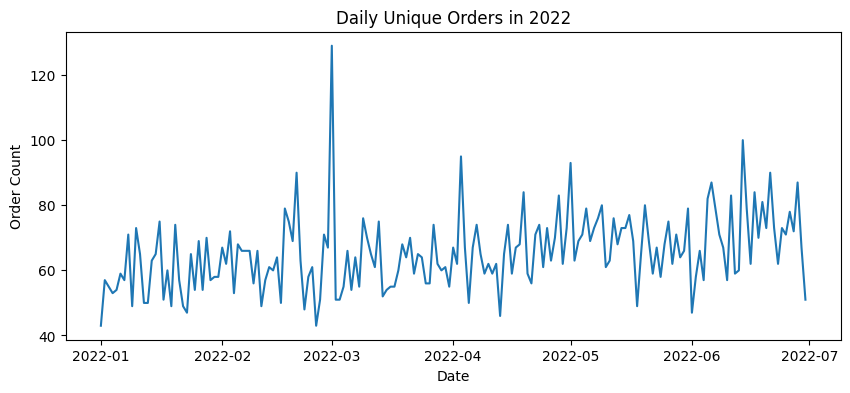

In [19]:
# Convert the selected date column (feat_name) to datetime format,
# coercing invalid entries to NaT (missing) to ensure consistency.
df[feat_name] = pd.to_datetime(df[feat_name], errors='coerce')

# Group transactions (date -> count) the number of unique order numbers per day.
orders_per_day = df.groupby(feat_name)['order_number'].nunique()
print(f"Number of unique dates: {len(orders_per_day)}")
print(f"Average orders per day: {orders_per_day.mean():.2f}")
# summary statistics (describe)
display(orders_per_day.describe())

# line plot visualises temporal patterns, seasonality, or anomalies
# across the 2022 time period.
plt.figure(figsize=(10,4))
plt.plot(orders_per_day.index, orders_per_day.values)
plt.title("Daily Unique Orders in 2022")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.show()

In [20]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_1_insights = """
orderdate includes 181 unique dates, covering the period from 2022-01-01 
to 2022-06-30, with an average of 65 orders per day.
Daily order counts range from 43 to 129, showing moderate fluctuations and 
several noticeable peaks, indicating possible promotional or seasonal sales 
events around late February and mid-June.
The distribution is stable with no missing or abnormal dates, suggesting 
continuous sales activity throughout the first half of 2022.
This feature is suitable for time-based aggregation (e.g., monthly or 
weekly order volume) and for deriving recency and seasonality features in 
later modeling stages.
"""

In [21]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### B.3 Explore Feature of Interest `orderquantity`

In [22]:
feat_name = 'orderquantity'

orderquantity
1    15599
2    11931
3     1951
Name: count, dtype: int64

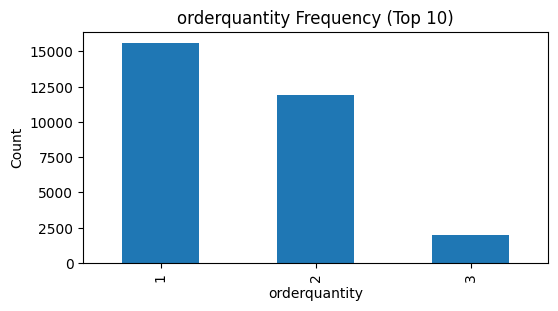

In [23]:
# all possible number of orderquantity
counts = df[feat_name].value_counts(dropna=False)
display(counts.head(10))
counts.head(10).plot(kind='bar', title=f"{feat_name} Frequency (Top 10)", figsize=(6,3))
plt.ylabel("Count")
plt.show()

In [24]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_2_insights = """
orderquantity takes only three discrete values — 1, 2, and 3 — with a 
strong skew toward single-unit purchases (~53% of all records).
Most transactions involve small quantities, reflecting typical 
consumer-level purchases rather than bulk or wholesale orders.
There are no invalid or zero values, and the limited range ensures 
consistency across transactions.
While the feature shows little variation, it remains useful for 
aggregating customer purchasing behavior (e.g., total or average quantity 
per customer) in the preparation stage.
"""

In [25]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### B.4 Explore Feature of Interest `territorykey`

In [26]:
feat_name = 'territorykey'

territorykey
1     4420
2       15
3       10
4     6122
5       25
6     3672
7     2756
8     2851
9     6315
10    3295
Name: count, dtype: int64

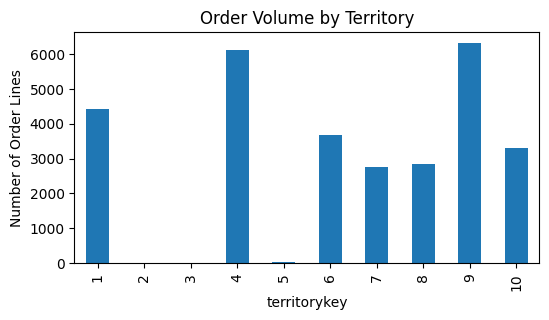

In [27]:
# all possible number of territorykey - matched with SB-2-territories
territory_counts = df[feat_name].value_counts().sort_index()
display(territory_counts)
territory_counts.plot(kind='bar', figsize=(6,3), title='Order Volume by Territory')
plt.ylabel("Number of Order Lines")
plt.show()

In [28]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_3_insights = """
territorykey spans 10 regions (1–10), with a highly uneven distribution of 
sales.
Most transactions originate from territories 4, 6, 9, and 1, while 
regions 2, 3, and 5 contribute negligibly.
This imbalance suggests concentrated sales activity in a few major 
territories, possibly reflecting regional market size or data collection 
coverage.
In preparation and modeling, this feature should be retained for regional 
segmentation but monitored for imbalance to avoid bias or overfitting 
toward dominant territories.
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)